In [11]:
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv("data/experiment-output.csv", header=0)
df.describe()

,fail_rate,cpu_threshold,total_offloading_requests,total_successful_offloads,qos_violations
count,30.000000,30.000000,30.0,30.000000,30.000000
mean,0.700000,75.000000,100.0,87.800000,70.233333
std,0.143839,17.370208,0.0,15.286686,60.683284
min,0.500000,50.000000,100.0,53.000000,0.000000
25%,0.600000,60.000000,100.0,77.500000,15.500000
50%,0.700000,75.000000,100.0,95.000000,54.500000
75%,0.800000,90.000000,100.0,100.000000,116.000000
max,0.900000,100.000000,100.0,100.000000,189.000000


### CPU Vs Qos Violation  Plot

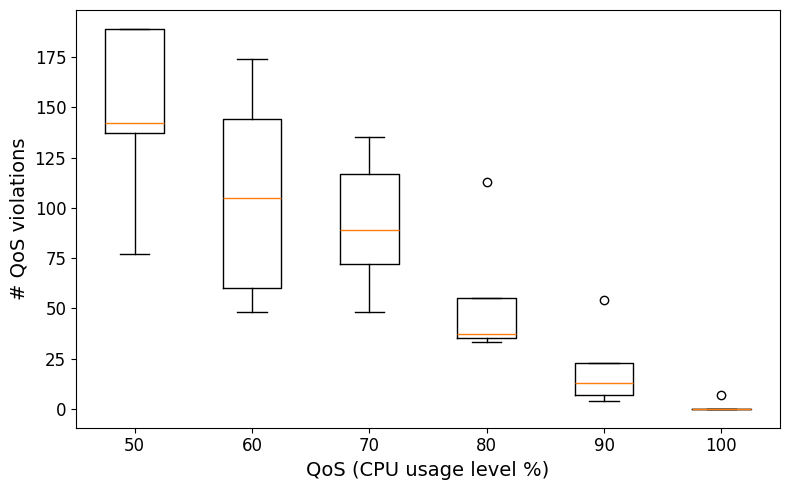

In [13]:

df_cpu_50 = df.where(df["cpu_threshold"] == 50).dropna()
df_cpu_60 = df.where(df["cpu_threshold"] == 60).dropna()
df_cpu_70 = df.where(df["cpu_threshold"] == 70).dropna()
df_cpu_80 = df.where(df["cpu_threshold"] == 80).dropna()
df_cpu_90 = df.where(df["cpu_threshold"] == 90).dropna()
df_cpu_100 = df.where(df["cpu_threshold"] == 100).dropna()


data = [df_cpu_50['qos_violations'], df_cpu_60['qos_violations'], df_cpu_70['qos_violations'], df_cpu_80['qos_violations'], df_cpu_90['qos_violations'], df_cpu_100['qos_violations']]

_fig = plt.figure(figsize =(8, 5)) 


# Making a plot 
plt.boxplot(data,labels=[50,60,70,80,90,100])

plt.xlabel('QoS (CPU usage level %)',fontsize=14)
plt.ylabel('# QoS violations', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.show()
plt.tight_layout()
plt.savefig('data/use_case_qos.pdf')  


### CPU QoS vs Failed Request Plot

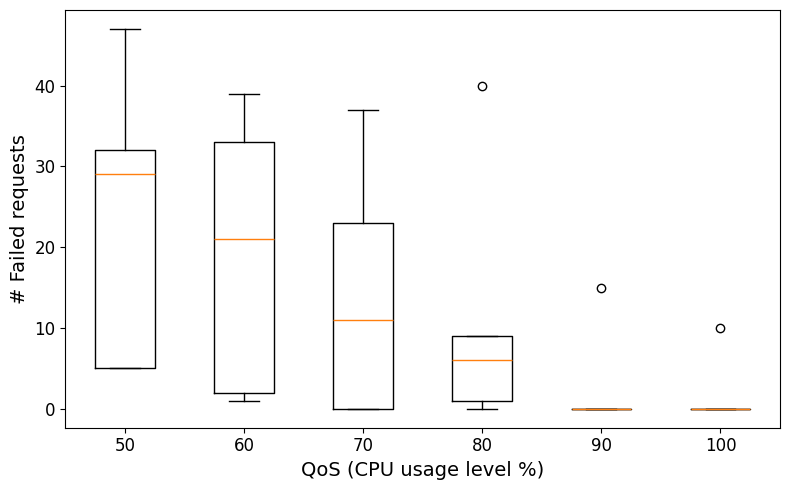

In [14]:

data = [(df_cpu_50['total_offloading_requests'] - df_cpu_50['total_successful_offloads']), (df_cpu_60['total_offloading_requests'] - df_cpu_60['total_successful_offloads']), 
        (df_cpu_70['total_offloading_requests'] - df_cpu_70['total_successful_offloads']), (df_cpu_80['total_offloading_requests'] - df_cpu_80['total_successful_offloads']), 
(df_cpu_90['total_offloading_requests'] - df_cpu_90['total_successful_offloads']), (df_cpu_100['total_offloading_requests'] - df_cpu_100['total_successful_offloads'])] 

_fig = plt.figure(figsize =(8, 5)) 


# Making a plot 
plt.boxplot(data,labels=[50,60,70,80,90,100])

plt.xlabel('QoS (CPU usage level %)',fontsize=14)
plt.ylabel('# Failed requests',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('data/use_case_failed_requests.pdf')  
plt.show()